# 1. Logistic Regression

## 1.1. Chuẩn bị

### Phân phối Logistic
Phân phối logistic là phân phối có hình dạng *chuông* gần giống với phân phối chuẩn

$$f(x;\mu,s) = \frac{\exp{\left(-\frac{x-\mu}{s}\right)}}{s\left(1+\exp{\left(-\frac{x-\mu}{s}\right)}\right)^{2}}$$

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

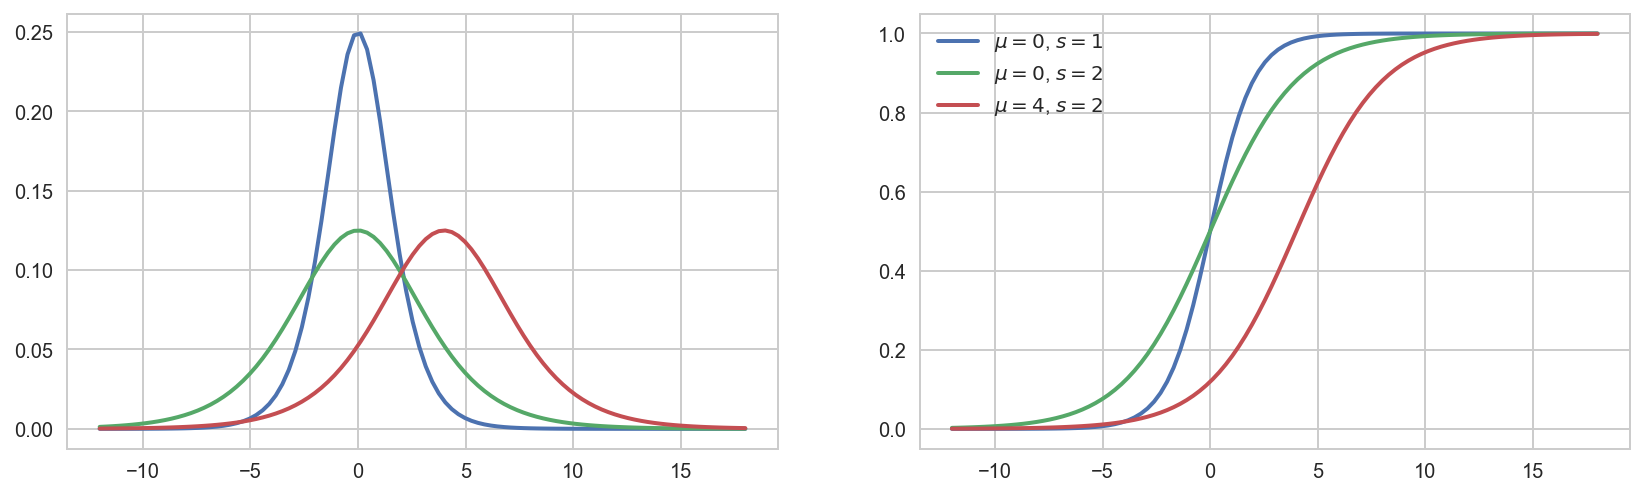

In [15]:
data = [(0, 1), (0, 2), (4, 2)]
fig, ax = plt.subplots(ncols=2, figsize=(14,4))
for mu, s in data:
    x = np.linspace(-12, 18, 100)
    y1 = stats.logistic(mu, s).pdf(x)
    y2 = stats.logistic(mu, s).cdf(x)
    ax[0].plot(x, y1, linewidth=2)
    ax[1].plot(x, y2, linewidth=2)
ax[1].legend([fr'$\mu={mu}$, $s={s}$' for mu, s in data])
plt.show()

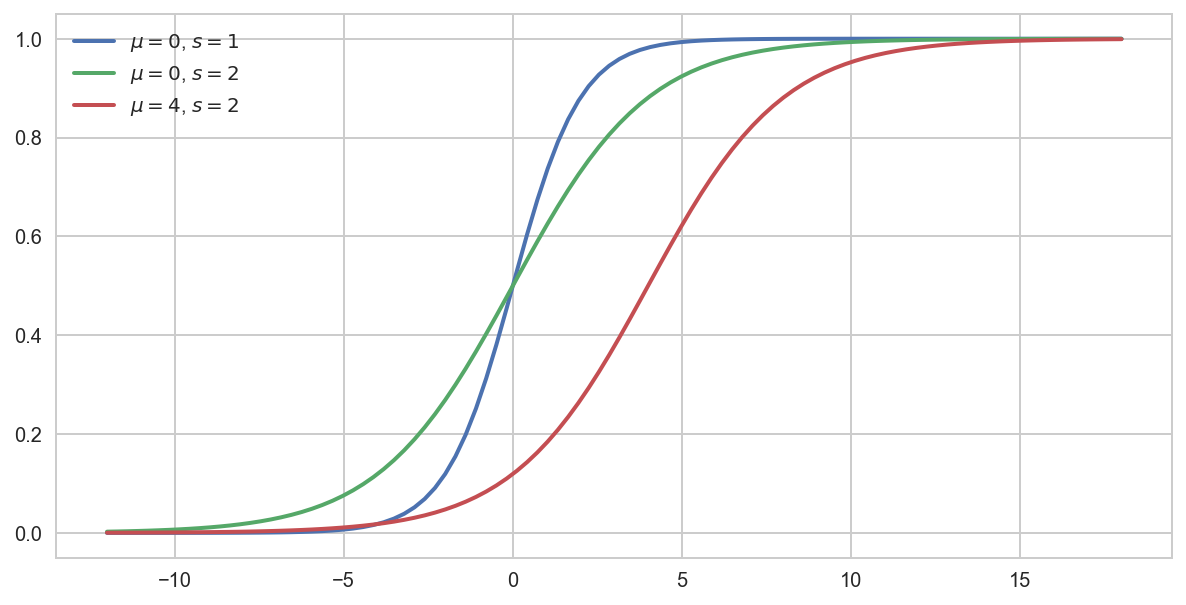

In [3]:
data = [(0, 1), (0, 2), (4, 2)]
fig, ax = plt.subplots(figsize=(10,5))
for mu, s in data:
    x = np.linspace(-12, 18, 100)
    y = stats.logistic(mu, s).cdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$\mu={mu}$, $s={s}$' for mu, s in data])
plt.show()

### Likelihood

### Maximum likelihood estimation

## 1.2. Thuật toán

Thuật toán [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) chỉ khác linear regression đó là biến đầu ra $\mathbf{y}$ thay vì là giá trị liên tục thì chỉ nhận 1 trong 2 giá trị 0 (negative) hoặc 1 (positive). Vì vậy hồi quy logistic được sử dụng trong bài toán phân lớp. Chính xác hơn, đầu ra của thuật toán là giá trị nằm trong khoảng $[0,1]$ - là xác suất rơi vào nhóm positive của các quan sát. Hàm hồi quy sẽ có dạng:

$$\mathbf{p} = \frac{1}{1+e^{-(w_0+w_1\mathbf{x}_1+w_2\mathbf{x}_2+\dots)}}$$

Trong đó:
- $\mathbf{y}=y_1,y_2,\dots,y_N$ là biến đầu ra
- $\mathbf{p}=p_1,p_2,\dots,p_N$ với $p_n=P(y_n=1|\mathbf{x}_n;\mathbf{w})$ là xác suất để $y_n=1$
- $\mathbf{x}_1,\mathbf{x}_2,\dots$ là các biến đầu vào
- $w_0,w_1,w_2,\dots$ là hệ số của hàm hồi quy

Một cách viết khác của hàm hồi quy là tỷ số odds (tỷ lệ success so với failed) cũng hay được sử dụng. Đây chính là dạng tuyến tính của mô hình hồi quy logistic:

$$\ln(\frac{\mathbf{p}}{1-\mathbf{p}}) = w_0+w_1\mathbf{x}_1+w_2\mathbf{x}_2+\dots$$

Công thức tổng quát của hàm hồi quy có dạng: $\mathbf{p}=f(\mathbf{X}\mathbf{w})$, với $f$ là hàm sigmoid (một trường hợp đặc biệt của hàm logistic):

$$f(x)=\frac{1}{1+e^{-x}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

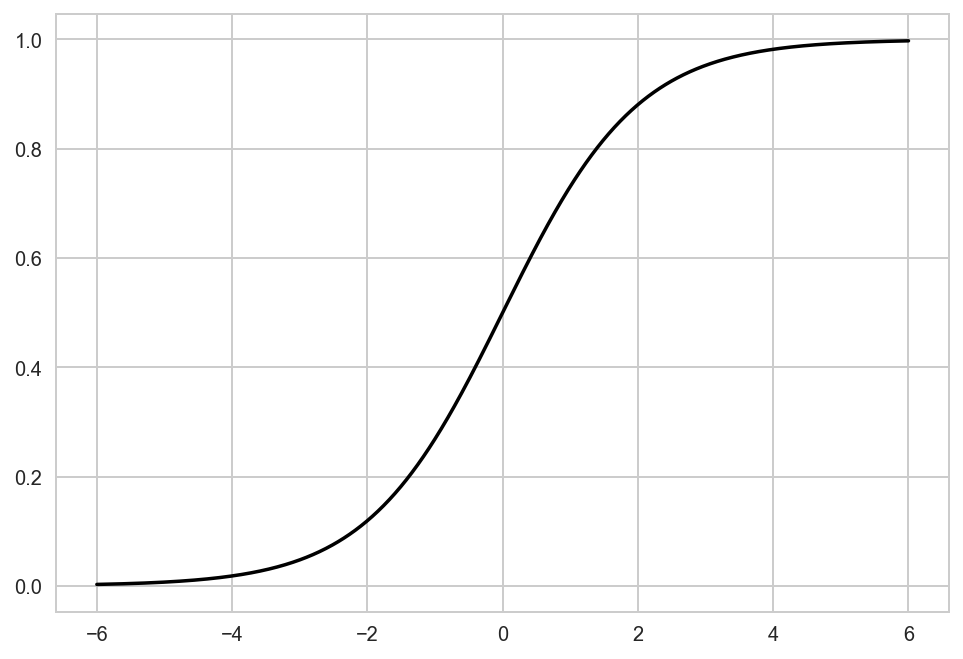

In [5]:
x = np.linspace(-6, 6, 1000)
y = 1 / (1 + np.e**(-x))

fig, ax = plt.subplots()
ax.plot(x, y, 'k')
plt.show()

#### Hàm mất mát

Đạo hàm hàm hồi quy ta có $P(\mathbf{y}=1)=f(\mathbf{X}\mathbf{w})$ và $P(\mathbf{y}=0)=1-f(\mathbf{X}\mathbf{w})$.
Công thức tổng quát sẽ cho ta giá trị likelihood:

$$P(\mathbf{y}=y|\mathbf{X}) = p^y(1-p)^{1-y} = \prod{p_i^{y_i}(1-p_i)^{1-y_i}}$$

Mục tiêu là tối đa hóa giá trị likelihood $P$ - khi $P$ càng lớn các điểm sẽ càng được phân lớp rõ ràng, tuy nhiên để tối ưu hàm số trên theo $w$ sẽ rất khó khăn, vì vậy ta lấy log 2 vế và thay vì tìm cực đại likelihood, ta sẽ tìm cực tiểu của log-likelihood. Đây là phương pháp [MLE](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). Hàm mất mát sẽ có dạng:

$$L(\mathbf{w}) = -\log P(\mathbf{y}|\mathbf{X}) = \sum{\left[y_i\log{p_i}+(1-y_i)\log{(1-p_i)}\right]}$$

Vector hệ số $\mathbf{w}$ thỏa mãn: $\hat{\mathbf{w}} =\arg\min L(\mathbf{w})$.

## 1.2. Implementation
[Logistic Regression implementation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) không có siêu tham số

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [36]:
credit = pd.read_csv('data/credit_scoring.csv')
credit = credit.dropna().reset_index()
credit.head()

,index,bad_customer,credit_balance_percent,age,num_of_group1_pastdue,debt_ratio,income,num_of_loans,num_of_times_late_90days,num_of_estate_loans,num_of_group2_pastdue,num_of_dependents
0,0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [37]:
y = credit.bad_customer.values
X = credit.drop(columns='bad_customer')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
logistic = LogisticRegression().fit(X_train, y_train)

In [40]:
y_train_pred = logistic.predict(X_train)
y_test_pred = logistic.predict(X_test)
y_test_prob_pred = logistic.predict_proba(X_test)

In [41]:
prob = pd.DataFrame(y_test_prob_pred)
prob = prob.assign(class_=y_test_pred)
prob.head()

,0,1,class_
0,0.980067,0.019933,0
1,0.942151,0.057849,0
2,0.973669,0.026331,0
3,0.938395,0.061605,0
4,0.923867,0.076133,0


In [42]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     89539
           1       0.58      0.04      0.08      6676

    accuracy                           0.93     96215
   macro avg       0.76      0.52      0.52     96215
weighted avg       0.91      0.93      0.90     96215



In [43]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22373
           1       0.53      0.04      0.08      1681

    accuracy                           0.93     24054
   macro avg       0.73      0.52      0.52     24054
weighted avg       0.90      0.93      0.90     24054



# 2. Naive Bayes

## 2.1. Định lý Bayes

Định lý bayes được sử dụng để tìm xác suất có điều kiện của event A khi chúng ta biết các sự kiện có liên quan. Giả sử 
$P(A)>0$ và ${B_1, B_2,\dots,B_n}$ là một tập hợp các sự kiện hoàn chỉnh. Với $k=1,2,\dots,n$ ta có:

$$P(B_k|A) = \frac{P(A|B_k)\cdot P(B_k)}{P(B_1)P(A|B_1)+P(B_2)\cdot P(A|B_2)+\dots+P(B_n)\cdot P(A|B_n)}$$

- $P(B_k|A)$ là xác suất có điều kiện: Xác suất của sự kiện $B_k$ xảy ra với điều kiện $A$ đã xảy ra. Đây còn được gọi là posterior probability của $B_k$ với $A$ cho trước.
- $P(A|B_k)$ cũng là xác suất có điều kiện: Xác suất của sự kiện $A$ xảy ra với điều kiện $B_k$ xảy ra 
- $P(A)$ và $P(B_k)$  là xác suất của các quan sát $A$ và $B_k$ khi độc lập hoàn toàn, còn được gọi là marginal probability hay prior probability.

## 2.2. Thuật toán
[Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) là thuật toán dựa trên định lý bayes [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem). Với bài toán phân loại, ta có tập hợp các biến đầu vào là $\mathbf{X}=\mathbf{x}_1,\mathbf{x}_2,\dots$ và $\mathbf{y}$ là biến đầu ra, định lý bayes được viết tổng quát là: 

$$P(\mathbf{y}|\mathbf{X}) = \frac{P(\mathbf{X}|\mathbf{y})P(\mathbf{y})}{P(\mathbf{X})}$$

- $P(\mathbf{y}|\mathbf{X})$ is the posterior probability, the probability of a class for given predictors
- $P(\mathbf{X}|\mathbf{y})$ is the likelihood, the probability of predictors for a given class
- $P(\mathbf{y})$ is the prior probability of a class
- $P(\mathbf{X})$ is the prior probability of predictors

Công thức dưới đây mô tả cách thuật toán phân loại các quan sát vào các lớp $c$:

$$\hat{\mathbf{y}} = \arg\max P(\mathbf{y}=c|\mathbf{X}) =
\arg\max P(\mathbf{X}|\mathbf{y}=c)P(\mathbf{y}=c)$$

### Ước lượng giá trị likelihood
Naive Bayes assumes that $\mathbf{x}_1,\mathbf{x}_2,\dots$ are independent of each other. This assumption looks quite unrealistic, explains why the algorithm is considered naive. However, Naive Bayes performs surprisingly well in real-world classification problems. The likelihood can be written under this assumption:

$$P(\mathbf{x}_1,\mathbf{x}_2,\dots|\mathbf{y}) = \prod{P(\mathbf{x}_i|\mathbf{y})}$$

To estimate $P(\mathbf{x}_i|\mathbf{y})$, there are three distributions can be used, depending on the input data:
- Gaussian distribution, used when the input data is continuous. The parameters $\mu_{\mathbf{y}}$ and $\sigma_{\mathbf{y}}$ are estimated using maximum likelihood.

$$P(\mathbf{x}_i|\mathbf{y}) = \frac{1}{\sqrt{2\pi\sigma^2_{\mathbf{y}}}} \exp\left(-\frac{(\mathbf{x}_i - \mu_{\mathbf{y}})^2}{2\sigma^2_{\mathbf{y}}}\right)$$

- Multinomial distribution, used when the input data is categorical data. Widely used in text classification. In this formula, $N$ represents the number of observations, $\alpha$ represents the Laplace smooth coefficient, $d$ is the number of words. $\alpha=1$ is usually chosen, prevents the probability to be 0.

$$P(\mathbf{x}_i|\mathbf{y}) = \frac{N(\mathbf{x}_i|\mathbf{y})+\alpha}{N(\mathbf{y})+\alpha d}$$

- Bernoulli distribution, used for binary input data.

$$P(\mathbf{x}_i|\mathbf{y}) = p_i^{\mathbf{x}_i}(1-p_i)^{1-\mathbf{x}_i}$$

## 2.2. Implementation

In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

### Tabular data
This section uses the Iris data, where input variables are continuous. For a mixed types dataset, we use `GaussianNB` for continuous input and `MultinomialNB` for categorical input, then multiply the predicted probability of each class.

In [21]:
iris = load_iris()
X = iris.data
y = iris.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
bayes = GaussianNB()
bayes = bayes.fit(X_train, y_train)

In [24]:
y_train_pred = bayes.predict(X_train)
y_test_pred = bayes.predict(X_test)

In [25]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.94      0.91      0.92        32
           2       0.92      0.95      0.93        37

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



In [26]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Text data
Text data is preprocessed so that each column represents a word, each row represents a graph. This table shows how many times a word occurs in a graph. Then apply `MultinomialNB`.

In [27]:
X_train = np.array([
    [2, 2, 1, 0, 0, 0, 0, 0, 0],
    [1, 3, 0, 1, 2, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 2, 1, 1]
])
y_train = np.array(['A', 'A', 'A', 'B'])

X_test = np.array([
    [1, 2, 0, 1, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 1, 1]
])

In [28]:
bayes = MultinomialNB()
bayes = bayes.fit(X_train, y_train)

In [29]:
bayes.predict(X_test)

array(['A', 'B'], dtype='<U1')

In [30]:
bayes.predict_proba(X_test)

array([[0.93708063, 0.06291937],
       [0.34255957, 0.65744043]])